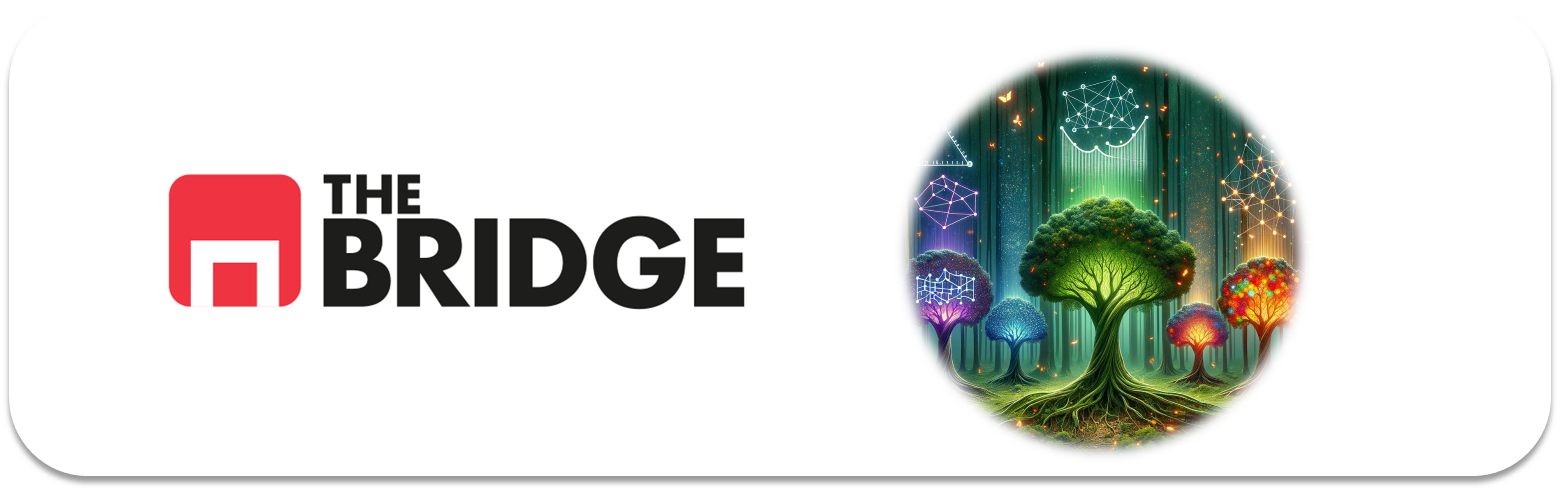

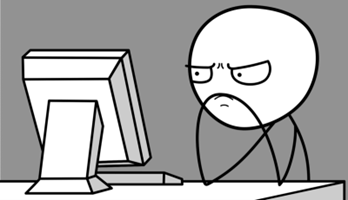

Para ejercitarte y afianzar lo aprendido sobre **Bagging y Boosting**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0.1

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost
from catboost import CatBoostClassifier, Pool

from pprint import pprint

### Ejercicio 0.2

Carga el dataset conocido como Mnist y vuélcalo en un array en numpy. Ejecuta la siguiente celda:

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
data = np.array(mnist.data)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Ejercicio 1

Muestra el contenido del dataset, las primersas 5 filas. Y luego utiliza la función que tienes a continuaicón para mostrar cada instancia de una forma gráfica. Muestra las cinco primeras y el target de las mismas

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mnist_images(images, bck_white = False):
    """
    Función para mostrar imágenes del dataset MNIST.

    :param images: Array de numpy con múltiples imágenes, cada una de 784 elementos.
    """
    # Número de imágenes
    num_images = len(images)

    # Crear una cuadrícula de subplots
    cols = int(np.sqrt(num_images))
    rows = (num_images // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # Convertir cada imagen de 784 elementos a un array 2D de 28x28
            img_matrix = images[i].reshape(28, 28)

            # Mostrar la imagen
            ax.imshow(img_matrix, cmap='gray' if not bck_white else "binary" )

            # Quitar los ejes
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()



¿Cuántos pixeles tiene de alto y ancho cada imagen?

In [7]:
# plot_mnist_images(data)

In [8]:
df = pd.DataFrame(mnist.data)
df.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejercicio 2

Separa en train y test. Muestra el número de instancias para cada grupo

In [9]:
X = mnist.data
y = mnist.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train:', len(X_train))
print('X_test:',len(X_test))
print('y_train:', len(y_train))
print('y_test:',len(y_test))

X_train: 56000
X_test: 14000
y_train: 56000
y_test: 14000


### Ejercicio 3

Entrena un clasificador basado en Random Forest. Haz la predicción sobre los 5 primeros elementos del dataset de train y comprueba visualmente cuánto ha acertado.

KeyError: 0

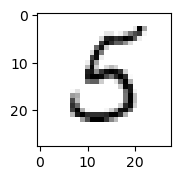

In [14]:

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_depth=4,
                                 random_state=42)

rnd_clf.fit(X_train,y_train)


y_train_predict = rnd_clf.predict(X_train[0:5])
y_train_adjusted = y_train[:5]

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_sample_train[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    plt.title(f'Pred: {y_train_predict[i]}\nActual: {y_train_adjusted.iloc[i]}', fontsize=10)
    plt.axis('off')

plt.show()

### Ejercicio 4

Pruébalo contra test y muestra su informe de clasificación

In [15]:
y_test_predict = rnd_clf.predict(X_test[0:5])

print(classification_report(y_test,y_test_predict))

ValueError: Found input variables with inconsistent numbers of samples: [14000, 5]

### Ejercicio 5

Obten la feature importance del modelo pero muéstrala como una imagen para que veamos que píxeles son más importantes (hay tantos coeficientes como píxeles, recuerda). PISTA: Igual puedes usar parte del código de la función anterior o todo.

In [16]:
rnd_clf.feature_importances_


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

ValueError: cannot reshape array of size 1 into shape (28,28)

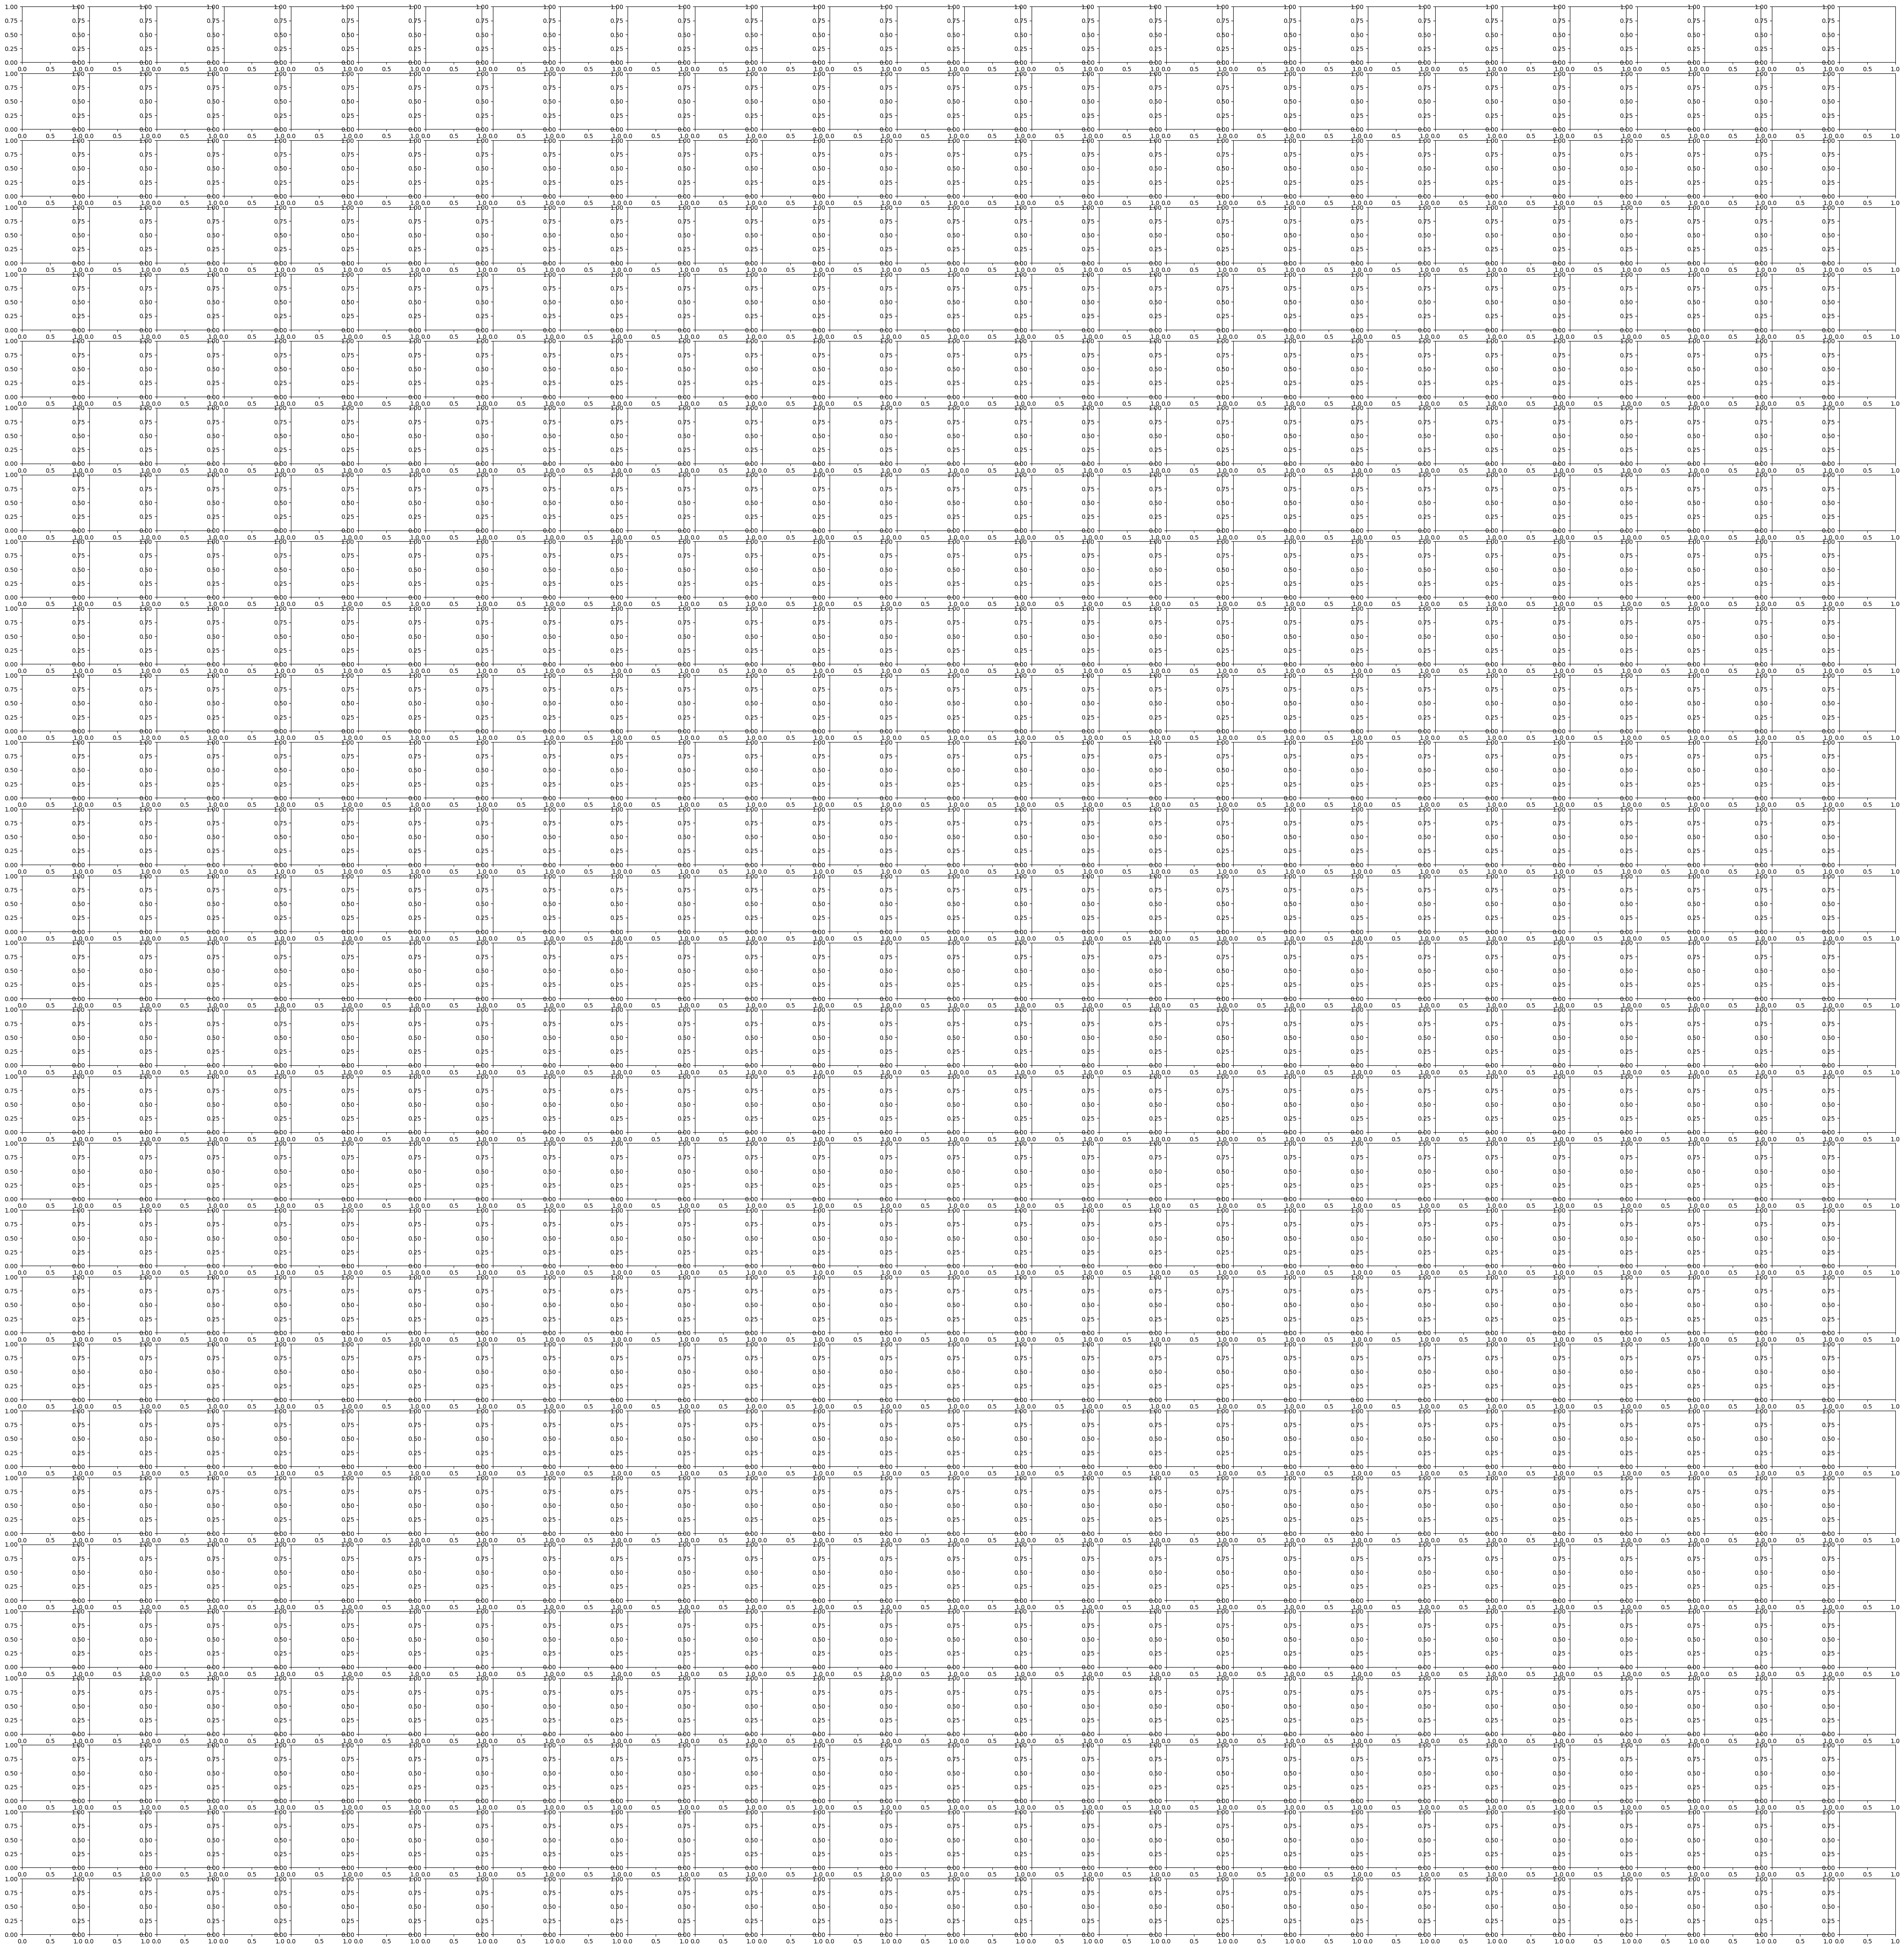

In [17]:
feature_importance = rnd_clf.feature_importances_

plot_mnist_images(feature_importance)

### Ejercicio 6 

Entrena ahora un ensamblado basado en el Gradient Boosted Trees de sklearn. Muestra la predicción de los números en las posiciones 20 a 25 de train y su target.

In [18]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train,y_train)
y_train_predict_gbc=gbc.predict(X_train[20:26])

In [ ]:
y_train_sample_gbc = y_train[20:26]

### Ejercicio 7

Pruébalo contra test y muestra su informe de clasificación

In [ ]:
y_test_predict_gbc = gbc.predict(X_test[20:26])

print(classification_report(y_test[20:26],y_test_predict_gbc))

### Ejercicio 8

Entrena ahora un ensamblado basado en XGBoost. Muestra la predicción de los números en las posiciones 50 a 55 de train y su target.

In [ ]:
xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train[50:56])

y_train_predict_xgb = xgb_clas.predict(X_train[50:56])

In [ ]:
y_train_sample_xgb = y_train[50:56]

### Ejercicio 9

Pruébalo contra test y muestra su informe de clasificación

In [ ]:

y_test_predict_xgb = xgb_clas.predict(X_test[50:56])
print(classification_report(y_test[50:56],y_test_predict_xgb))

### Ejercicio 10

Entrena ahora un ensamblado basado en LightGBM. Muestra la predicción de los números en las posiciones 125 a 130 de train y su target.

In [ ]:
lgbm_clas = LGBMClassifier(random_state=42, verbose = False)

lgbm_clas = lgbm_clas.fit(X_train[125:131])

In [ ]:
y_train_sample_lgb = y_train[125:131]

### Ejercicio 11

Pruébalo contra test y muestra su informe de clasificación

In [ ]:
y_test_predict_lgbm = lgbm_clas.predict(X_test[125:131])
print(classification_report(y_test[125:131],y_test_predict_lgbm))

### Ejercicio 12

Entrena ahora un ensamblado basado en CatBoost. Muestra la predicción de los números en las posiciones 305 a 310 de train y su target.

In [ ]:
cb = CatBoostClassifier(random_state=42, verbose = False)

pool_train = Pool(X_train[305:311],y_train[305:311])
pool_test = Pool(X_test[305:311])

cb.fit(pool_train)

In [ ]:
y_train_sample_cb = y_train[305:311]

### Ejercicio 13

Pruébalo contra test y muestra su informe de clasificación

In [ ]:
y_test_predict_cb = cb.predict(X_test[305:311])
print(classification_report(y_test[305:311],y_test_predict_cb))

### Ejercicio 14

A la vista de los resultados, ¿con qué modelo te quedarías?